In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import dates
from datetime import datetime
import sklearn
import seaborn as sns


In [2]:
walmart_data = pd.read_csv("C:/Users/Rochan Nehete/Desktop/Work/Classes/Summer/Intro_to_ML/Project ideas/idea_4_walmart/main/data/Walmart_Store_sales.csv")
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
# Convert date to datetime format 
walmart_data['Date'] =  pd.to_datetime(walmart_data['Date'])
walmart_data
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


C:\Users\Rochan Nehete\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Rochan Nehete\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Rochan Nehete\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Rochan Nehete\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY 

In [4]:
walmart_data["Day"]= pd.DatetimeIndex(walmart_data['Date']).day
walmart_data['Month'] = pd.DatetimeIndex(walmart_data['Date']).month
walmart_data['Year'] = pd.DatetimeIndex(walmart_data['Date']).year
walmart_data
walmart_data[walmart_data['Store']==14]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
1859,14,2010-05-02,2623469.95,0,27.31,2.784,181.871190,8.992,2,5,2010
1860,14,2010-12-02,1704218.84,1,27.73,2.773,181.982317,8.992,2,12,2010
1861,14,2010-02-19,2204556.70,0,31.27,2.745,182.034782,8.992,19,2,2010
1862,14,2010-02-26,2095591.63,0,34.89,2.754,182.077469,8.992,26,2,2010
1863,14,2010-05-03,2237544.75,0,37.13,2.777,182.120157,8.992,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
1997,14,2012-09-28,1522512.20,0,64.88,3.997,192.013558,8.684,28,9,2012
1998,14,2012-05-10,1687592.16,0,64.89,3.985,192.170412,8.667,10,5,2012
1999,14,2012-12-10,1639585.61,0,54.47,4.000,192.327265,8.667,10,12,2012
2000,14,2012-10-19,1590274.72,0,56.47,3.969,192.330854,8.667,19,10,2012


In [5]:
total_sales= walmart_data.groupby('Store')['Weekly_Sales'].sum().sort_values()
total_sales

walmart_dates= walmart_data.groupby('Date')
walmart_dates.head(1)['Date']

0     2010-05-02
1     2010-12-02
2     2010-02-19
3     2010-02-26
4     2010-05-03
         ...    
138   2012-09-28
139   2012-05-10
140   2012-12-10
141   2012-10-19
142   2012-10-26
Name: Date, Length: 143, dtype: datetime64[ns]

In [6]:
total_sales_array = np.array(total_sales)
total_sales_array

array([3.71602220e+07, 4.32930878e+07, 4.54756889e+07, 5.34122150e+07,
       5.51596264e+07, 5.75867351e+07, 6.27168851e+07, 7.42027403e+07,
       7.42524254e+07, 7.71415543e+07, 7.77892190e+07, 7.95657524e+07,
       8.15982751e+07, 8.91336839e+07, 9.05654354e+07, 1.01061179e+08,
       1.08117879e+08, 1.12395341e+08, 1.27782139e+08, 1.29951181e+08,
       1.31520672e+08, 1.37870310e+08, 1.38249763e+08, 1.43416394e+08,
       1.44287230e+08, 1.47075649e+08, 1.55114734e+08, 1.66819246e+08,
       1.81341935e+08, 1.89263681e+08, 1.93962787e+08, 1.94016021e+08,
       1.98750618e+08, 1.99613906e+08, 2.06634862e+08, 2.07445542e+08,
       2.22402809e+08, 2.23756131e+08, 2.53855917e+08, 2.71617714e+08,
       2.75382441e+08, 2.86517704e+08, 2.88999911e+08, 2.99543953e+08,
       3.01397792e+08])

<AxesSubplot:title={'center':'Total sales for each store'}, xlabel='Store', ylabel='Total Sales'>

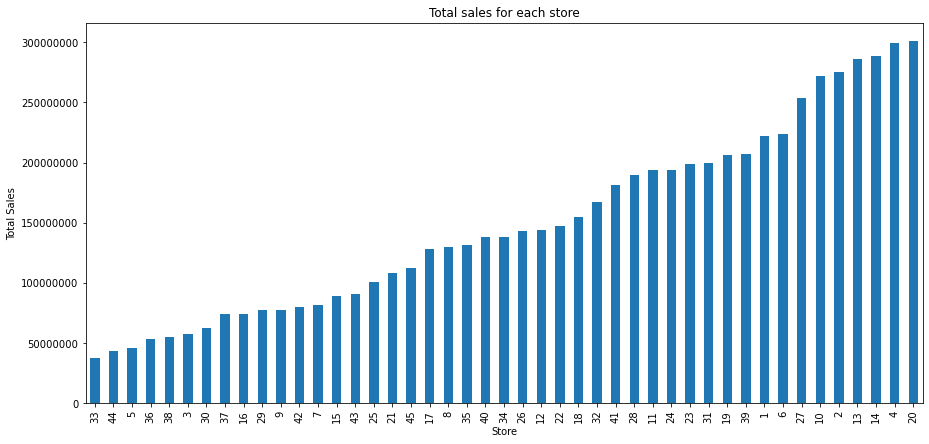

In [7]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
total_sales.plot(kind='bar')

In [8]:
walmart_data_std = pd.DataFrame(walmart_data.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False))
walmart_data_std
walmart_data_std.head(1)

,Weekly_Sales
Store,
14,317569.949476


In [9]:
walmart_data[walmart_data['Store'] == walmart_data_std.head(1).index[0]]['Weekly_Sales']

1859    2623469.95
1860    1704218.84
1861    2204556.70
1862    2095591.63
1863    2237544.75
           ...    
1997    1522512.20
1998    1687592.16
1999    1639585.61
2000    1590274.72
2001    1704357.62
Name: Weekly_Sales, Length: 143, dtype: float64

C:\Users\Rochan Nehete\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


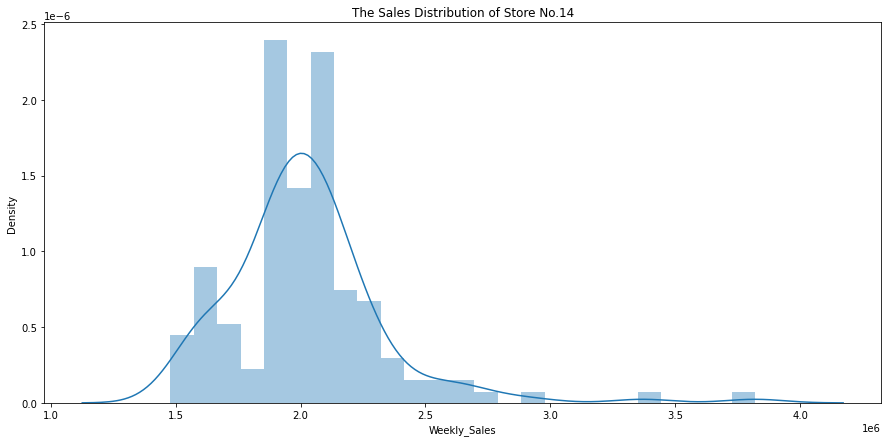

In [10]:
#Make a distribution of mean sales of all stores 



# Extracting the sales data for store number 14 and plotting its distribution in the form of a histogram
plt.figure(figsize=(15,7))
sns.distplot(walmart_data[walmart_data['Store'] == walmart_data_std.head(1).index[0]]['Weekly_Sales'])
plt.title('The Sales Distribution of Store No.'+ str(walmart_data_std.head(1).index[0]))
import warnings
warnings.filterwarnings('ignore')

In [11]:
#Defining holiday dates
Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']

In [12]:
#Calculating mean sales on holidays : 
Super_Bowl_Sales = (pd.DataFrame(walmart_data.loc[walmart_data.Date.isin(Super_Bowl)]))['Weekly_Sales'].mean()
Labour_Day_Sales = (pd.DataFrame(walmart_data.loc[walmart_data.Date.isin(Labour_Day)]))['Weekly_Sales'].mean()
Thanksgiving_Sales = (pd.DataFrame(walmart_data.loc[walmart_data.Date.isin(Thanksgiving)]))['Weekly_Sales'].mean()
Christmas_Sales = (pd.DataFrame(walmart_data.loc[walmart_data.Date.isin(Christmas)]))['Weekly_Sales'].mean()
Super_Bowl_Sales,Labour_Day_Sales,Thanksgiving_Sales,Christmas_Sales

(1079127.9877037033, 1042427.2939259257, 1471273.427777778, 960833.1115555551)

In [13]:
#Calculating mean sales on non-holidays :
Non_Holiday_Sales = walmart_data[walmart_data['Holiday_Flag'] == 0 ]['Weekly_Sales'].mean()
Non_Holiday_Sales

1041256.3802088564

In [14]:
Mean_Sales = {'Super_Bowl_Sales' : Super_Bowl_Sales,
              'Labour_Day_Sales': Labour_Day_Sales,
              'Thanksgiving_Sales':Thanksgiving_Sales,
              'Christmas_Sales': Christmas_Sales,
              'Non_Holiday_Sales': Non_Holiday_Sales}
Mean_Sales 

{'Super_Bowl_Sales': 1079127.9877037033,
 'Labour_Day_Sales': 1042427.2939259257,
 'Thanksgiving_Sales': 1471273.427777778,
 'Christmas_Sales': 960833.1115555551,
 'Non_Holiday_Sales': 1041256.3802088564}

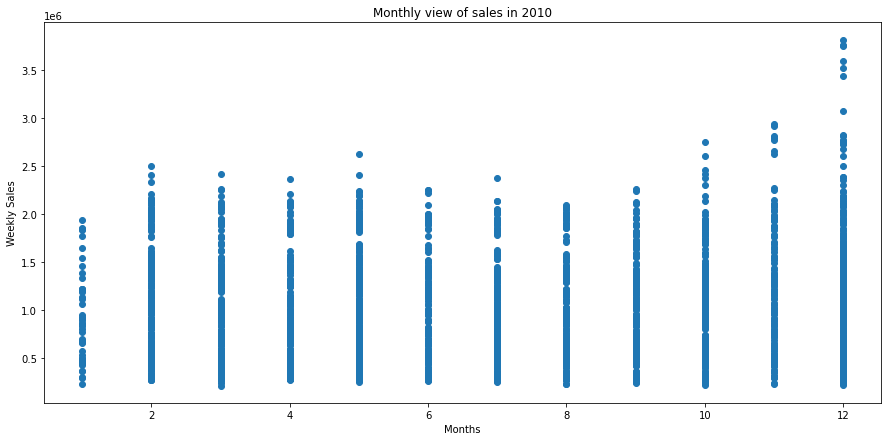

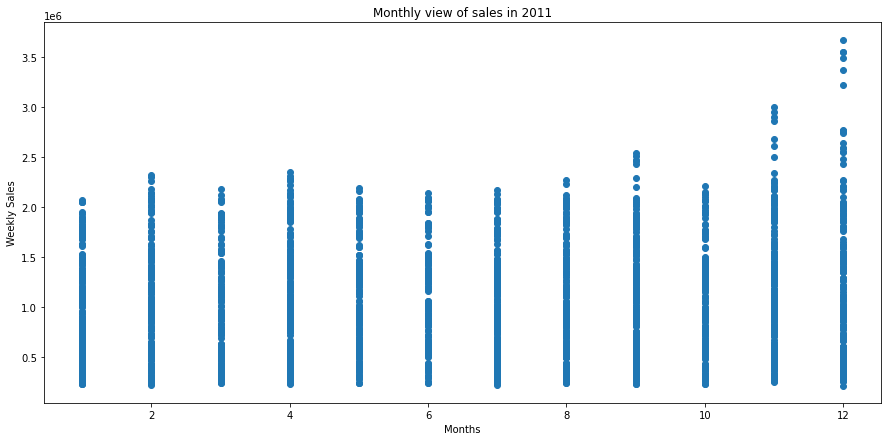

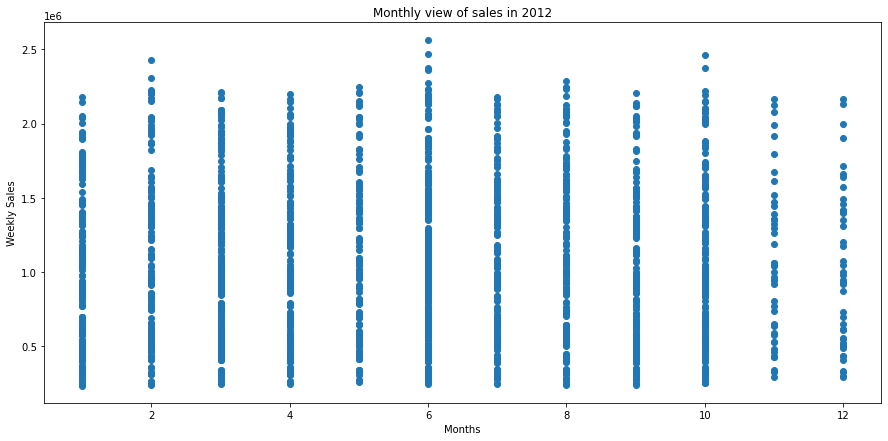

In [15]:
#Year-wise Monthly Sales

plt.figure(figsize=(15,7))
plt.scatter(walmart_data[walmart_data.Year==2010]["Month"],walmart_data[walmart_data.Year==2010]["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2010")
plt.show()

plt.figure(figsize=(15,7))
plt.scatter(walmart_data[walmart_data.Year==2011]["Month"],walmart_data[walmart_data.Year==2011]["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2011")
plt.show()

plt.figure(figsize=(15,7))
plt.scatter(walmart_data[walmart_data.Year==2012]["Month"],walmart_data[walmart_data.Year==2012]["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2012")
plt.show()

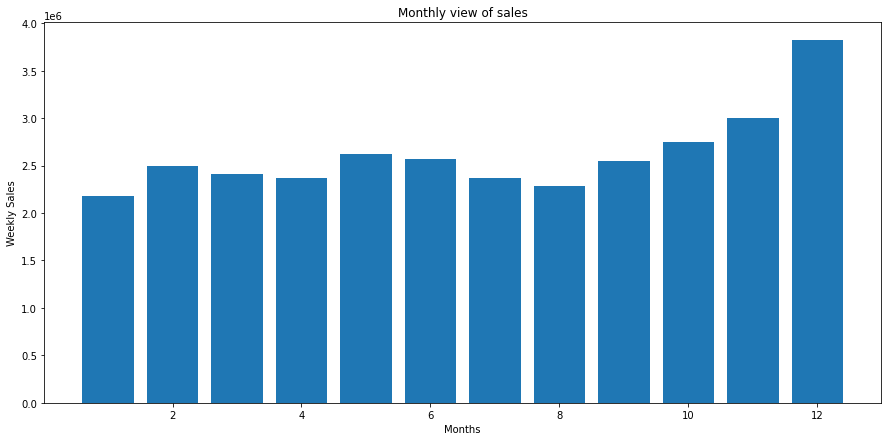

In [16]:
#Overall Monthly Sales
plt.figure(figsize=(15,7))
plt.bar(walmart_data["Month"],walmart_data["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales")
plt.show()

<Figure size 1080x504 with 0 Axes>

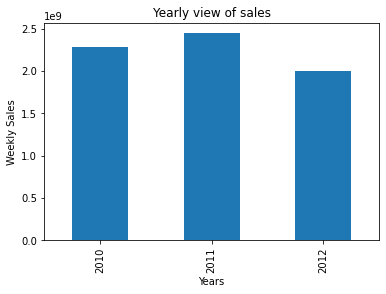

In [17]:
#Yearly Sales
plt.figure(figsize=(15,7))
walmart_data.groupby("Year")[["Weekly_Sales"]].sum().plot(kind='bar',legend=False)
plt.xlabel("Years")
plt.ylabel("Weekly Sales")
plt.title("Yearly view of sales")
plt.show()

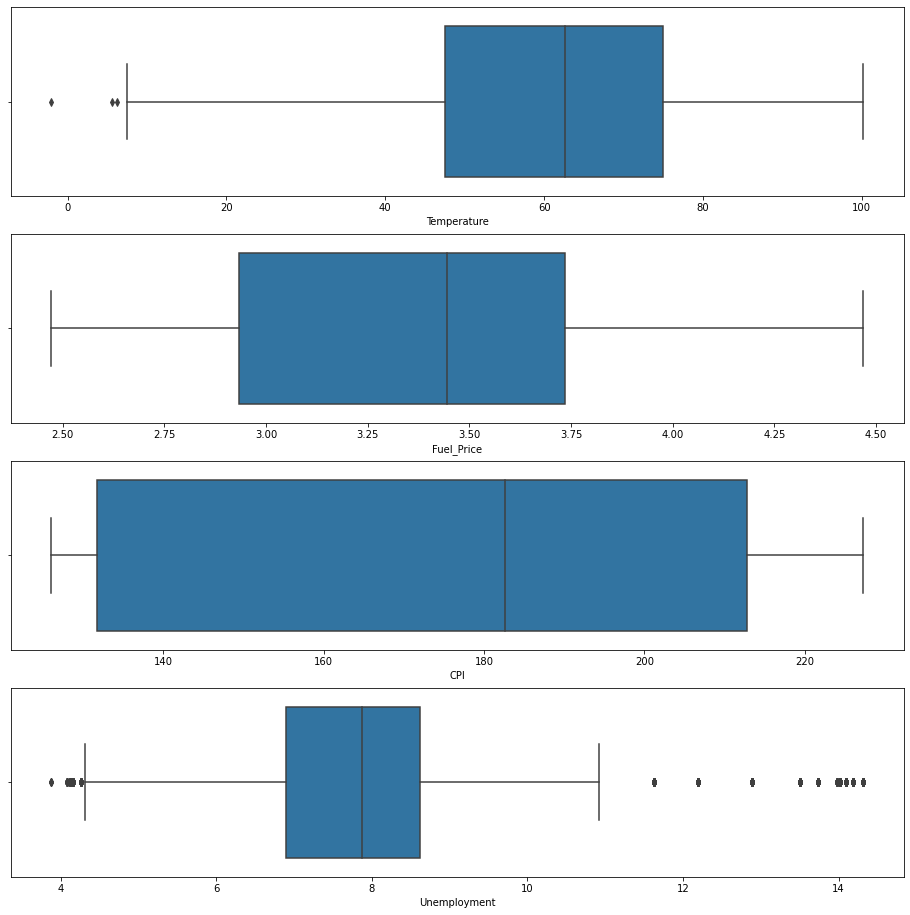

In [19]:

.


In [20]:
# Dropping outliers     
walmart_data_clean = walmart_data[(walmart_data['Unemployment']<10) & (walmart_data['Unemployment']>4.5) & (walmart_data['Temperature']>10)]
walmart_data_clean

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


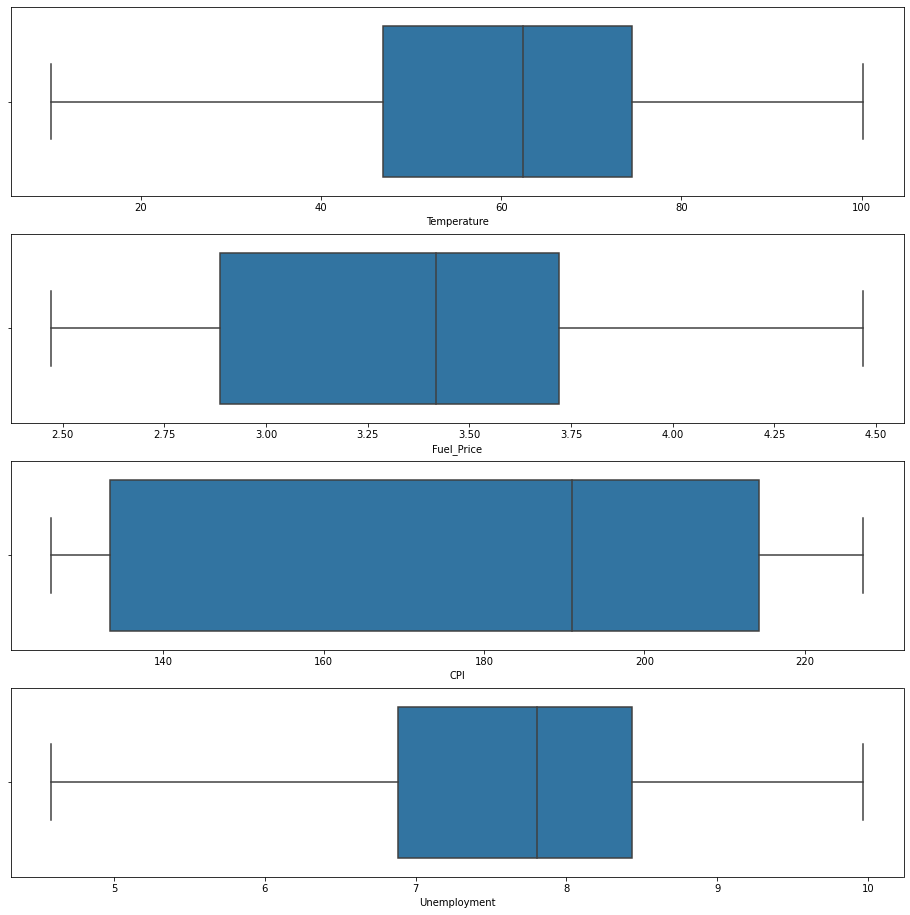

In [21]:
#Checking data for outliers
fig, axis = plt.subplots(4,figsize=(16,16))
X = walmart_data_clean[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(walmart_data_clean[column], ax=axis[i])

import warnings
warnings.filterwarnings('ignore')
    

In [54]:
# Linear Regression :
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
#X = walmart_data_clean[['Store','Fuel_Price','Holiday_Flag','Temperature','CPI','Unemployment','Day','Month','Year']]
X = walmart_data_clean[['Store','Fuel_Price','Holiday_Flag','Temperature','CPI','Unemployment','Day','Month','Year']]
Y = walmart_data_clean['Weekly_Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2) #TRAIN TEST SPLIT FOR LINEAR REGRESSION

Linear Regression:

Accuracy: 13.92012194493667
Mean Absolute Error: 451016.75851484475
Mean Squared Error: 290258052912.51013
Root Mean Squared Error: 538756.0235510228


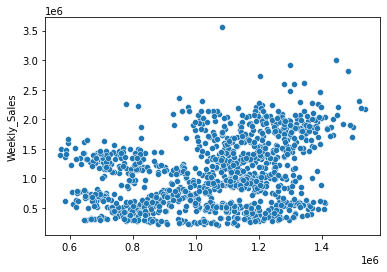

In [46]:
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, Y_train)*100) #https://scikit-learn.org/stable/modules/model_evaluation.html
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
sns.scatterplot(Y_pred, Y_test) 
#scatter 
import warnings
warnings.filterwarnings('ignore')

Linear Regression: parameters tuning

Accuracy: 13.99229648826752
Mean Absolute Error: 463007.02138830704
Mean Squared Error: 306682962491.49536
Root Mean Squared Error: 553789.6373998843


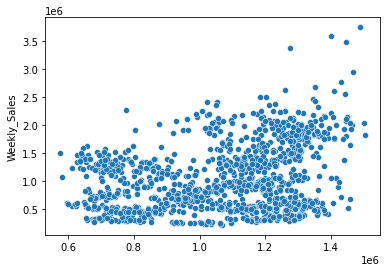

In [32]:
print('Linear Regression: parameters tuning')
print()
reg = LinearRegression(fit_intercept=True)
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, Y_train)*100) #https://scikit-learn.org/stable/modules/model_evaluation.html
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
sns.scatterplot(Y_pred, Y_test) 
#scatter 
import warnings
warnings.filterwarnings('ignore')

Random Forest Regressor:

Accuracy: 93.85123818067258
Mean Absolute Error: 69882.85108038867
Mean Squared Error: 20856736517.291897
Root Mean Squared Error: 144418.61554969946


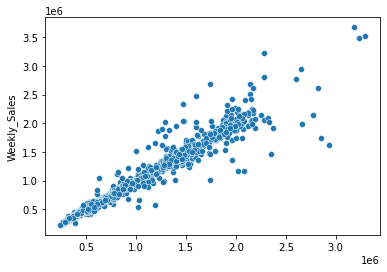

In [49]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor()        
rfr.fit(X_train,Y_train)
Y_pred = rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, Y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
sns.scatterplot(Y_pred, Y_test)


import warnings
warnings.filterwarnings('ignore')

In [ ]:
#can you visualize the random forest regressor tree in Python??? 

In [2]:
#Boosting
from sklearn.ensemble import GradientBoostingRegressor
boostreg= GradientBoostingRegressor()
boostreg.fit(X_train,Y_train) 
Y_pred_boost = boostreg.predict(X_test)
print('Accuracy:',boostreg.score(X_test, Y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_boost))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_boost))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_boost)))
sns.scatterplot(Y_pred_boost, Y_test)



import warnings
warnings.filterwarnings('ignore')

NameError: name 'X_train' is not defined

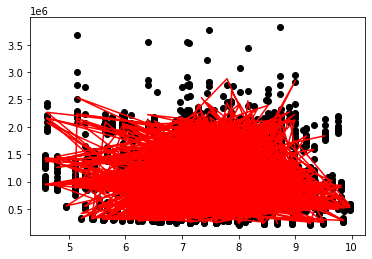

In [35]:
plt.scatter(X_train['Unemployment']
, Y_train , color="black")
plt.plot(X_test['Unemployment'], Y_pred , color="red")


In [1]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor()        
rfr.fit(X_train,np.log(Y_train))
Y_pred = rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, np.log(Y_test))*100)
print('Mean Absolute Error:', metrics.mean_absolute_error( np.log(Y_test), Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(np.log(Y_test), Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.log(Y_test), Y_pred)))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfr, X_train, Y_train, cv=4)
print(scores)
scores
sns.scatterplot(Y_pred, Y_test)


import warnings
warnings.filterwarnings('ignore')

Random Forest Regressor:



NameError: name 'X_train' is not defined

In [ ]:
plt.plot